# My First Convolutional Neural Network : MNIST
---
## 일단 Quick 하게

코드는 정말 수루룩 끝난다!

그래서 다시 한 번! 아래 그림을 보고 구조를 확실히 추적할 수 있어야 한다.

* [Ex1](https://cdn-images-1.medium.com/max/1600/1*O9ulXVmjBustHGLi1zRthA.png)
* [Ex2](https://cdn-images-1.medium.com/max/1600/1*jqKHgwZ8alM3K_JRYO_l4w.png)



### Keras Upgrade

In [1]:
!pip install keras-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.5 MB/s eta 0:00:00


### 라이브러리 로딩

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import keras

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id = 9019
다음 그림은 숫자 7 입니다.


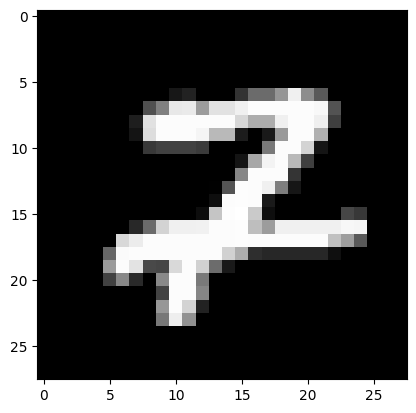

In [5]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0, 10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y[id]} 입니다.')
plt.imshow(test_x[id], cmap='gray')
plt.show()

### Convolutional Layer를 사용하기 위한 reshape!

- **채널이 추가되어야 한다**

In [6]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
train_x = train_x.reshape((-1, 28, 28, 1))
test_x = test_x.reshape((-1, 28, 28, 1))

In [8]:
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

* 이미지가 0 ~ 1 사이 값을 갖도록 스케일 조정!

In [9]:
## 익숙해지면 사용!
# train_x = train_x / 255
# test_x = test_x / 255

In [10]:
max_n, min_n = train_x.max(), train_x.min()

In [11]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [12]:
train_x.max(), train_x.min()

(1.0, 0.0)

* One-hot Encoding

In [13]:
from keras.utils import to_categorical

In [14]:
train_y.shape

(60000,)

In [15]:
classes_n = len(np.unique(train_y))

In [16]:
## 주의점
## 1. 반복 실행해도 에러 발생하지 않고 계속해서 차원을 만들어줍니다. -> 반복 실행 주의
## 2. 자동으로 클래스 수를 세서 모양을 만들어줍니다. -> 전처리가 제대로 안 되었을 경우에는?

train_y = to_categorical(train_y, classes_n)
test_y = to_categorical(test_y, classes_n)

In [17]:
train_x.shape, train_y.shape

((60000, 28, 28, 1), (60000, 10))

## 모델링

- Sequential API, Functional API 중 택일
- CNN에 관한 것만 추가가 된다.
[여기](https://keras.io/layers/convolutional/)를 적극적으로 참고하자.

In [18]:
import keras

from keras.utils import clear_session
from keras.models import Sequential, Model

from keras.layers import Input, Dense, Flatten
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout

In [19]:
## Sequential API
## 1.세션 클리어
clear_session()

## 2.모델 발판 선언
model = Sequential()

## 3.모델 블록 조립
model.add( Input(shape=(28,28,1)) )
model.add( Conv2D(filters=32,        ## 서로 다른 필터 32개를 사용하겠다는 의미, 새로운 feature map 32개를 만들겠다는 의미
                  kernel_size=(3,3), ## Conv2D filter의 가로세로 사이즈 (depth는 자동 보정)
                  strides=(1,1),     ## Conv2D filter의 이동 보폭
                  padding='same',    ## 1.앞전 feature map 사이즈 유지 | 2.외곽 정보를 더 반영
                  activation='relu', ## 빼먹지 않기
                  ) )
model.add( Conv2D(filters=32,        ## 서로 다른 필터 32개를 사용하겠다는 의미, 새로운 feature map 32개를 만들겠다는 의미
                  kernel_size=(3,3), ## Conv2D filter의 가로세로 사이즈 (depth는 자동 보정)
                  strides=(1,1),     ## Conv2D filter의 이동 보폭
                  padding='same',    ## 1.앞전 feature map 사이즈 유지 | 2.외곽 정보를 더 반영
                  activation='relu', ## 빼먹지 않기
                  ) )
model.add( MaxPool2D(pool_size=(2,2),## Maxpool2D filter의 가로세로 사이즈
                     strides=(2,2),  ## Maxpool2D filter의 이동 보폭 (기본값은 pool_size를 따름)
                     ) )
model.add( BatchNormalization() )
model.add( Dropout(0.4))

model.add( Conv2D(filters=64,        ## 서로 다른 필터 64개를 사용하겠다는 의미, 새로운 feature map 64개를 만들겠다는 의미
                  kernel_size=(3,3), ## Conv2D filter의 가로세로 사이즈 (depth는 자동 보정)
                  strides=(1,1),     ## Conv2D filter의 이동 보폭
                  padding='same',    ## 1.앞전 feature map 사이즈 유지 | 2.외곽 정보를 더 반영
                  activation='relu', ## 빼먹지 않기
                  ) )
model.add( Conv2D(filters=64,        ## 서로 다른 필터 64개를 사용하겠다는 의미, 새로운 feature map 64개를 만들겠다는 의미
                  kernel_size=(3,3), ## Conv2D filter의 가로세로 사이즈 (depth는 자동 보정)
                  strides=(1,1),     ## Conv2D filter의 이동 보폭
                  padding='same',    ## 1.앞전 feature map 사이즈 유지 | 2.외곽 정보를 더 반영
                  activation='relu', ## 빼먹지 않기
                  ) )
model.add( MaxPool2D(pool_size=(2,2),## Maxpool2D filter의 가로세로 사이즈
                     strides=(2,2),  ## Maxpool2D filter의 이동 보폭 (기본값은 pool_size를 따름)
                     ) )
model.add( BatchNormalization() )
model.add( Dropout(0.4))

model.add( Flatten() )
model.add( Dense(64, activation='relu') )
model.add( Dense(10, activation='softmax') )

## 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,794 (1.02 MB)

 Trainable params: 266,602 (1.02 MB)

 Non-trainable params: 192 (768.00 B)

In [20]:
## Functional API
## 1. 세션 클리어
clear_session()

## 2. 레이어 사슬처럼 엮기
il = Input(shape=(28,28,1))

hl = Conv2D(filters=32,        ## 서로 다른 filter 32개를 사용하겠다! 새로운 feature map 32개를 만들겠다!
            kernel_size=(3,3), ## Conv2D filter의 가로세로 사이즈
            strides=(1,1),     ## Conv2D filter의 이동 보폭
            padding='same',    ## 1.앞전 feature map 사이즈 유지 | 2.외곽 정보를 더 반영하려는 의도
            activation='relu', ## 빼먹지 않기!
            )(il)
hl = Conv2D(filters=32,        ## 서로 다른 filter 32개를 사용하겠다! 새로운 feature map 32개를 만들겠다!
            kernel_size=(3,3), ## Conv2D filter의 가로세로 사이즈
            strides=(1,1),     ## Conv2D filter의 이동 보폭
            padding='same',    ## 1.앞전 feature map 사이즈 유지 | 2.외곽 정보를 더 반영하려는 의도
            activation='relu', ## 빼먹지 않기!
            )(hl)
hl = MaxPool2D(pool_size=(2,2),## Maxpool2D filter의 가로세로 사이즈
               strides=(2,2),  ## Maxpool2D filter의 이동 보폭
               )(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.4)(hl)

hl = Conv2D(filters=64,        ## 서로 다른 filter 64개를 사용하겠다! 새로운 feature map 64개를 만들겠다!
            kernel_size=(3,3), ## Conv2D filter의 가로세로 사이즈
            strides=(1,1),     ## Conv2D filter의 이동 보폭
            padding='same',    ## 1.앞전 feature map 사이즈 유지 | 2.외곽 정보를 더 반영하려는 의도
            activation='relu', ## 빼먹지 않기!
            )(hl)
hl = Conv2D(filters=64,        ## 서로 다른 filter 64개를 사용하겠다! 새로운 feature map 64개를 만들겠다!
            kernel_size=(3,3), ## Conv2D filter의 가로세로 사이즈
            strides=(1,1),     ## Conv2D filter의 이동 보폭
            padding='same',    ## 1.앞전 feature map 사이즈 유지 | 2.외곽 정보를 더 반영하려는 의도
            activation='relu', ## 빼먹지 않기!
            )(hl)
hl = MaxPool2D(pool_size=(2,2),## Maxpool2D filter의 가로세로 사이즈
               strides=(2,2),  ## Maxpool2D filter의 이동 보폭
               )(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.4)(hl)

hl = Flatten()(hl)
hl = Dense(64, activation='relu')(hl)
ol = Dense(10, activation='softmax')(hl)

## 3. 모델 시작과 끝 지정
model = Model(il, ol)

## 요약
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,794 (1.02 MB)

 Trainable params: 266,602 (1.02 MB)

 Non-trainable params: 192 (768.00 B)

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [22]:
from keras.callbacks import EarlyStopping

In [23]:
es = EarlyStopping(monitor='val_loss',       ## 얼리스토핑을 적용할 관측 지표
                   min_delta=0,              ## 관측 지표에 대한 임계값.
                   patience=3,               ## 성능 개선이 발생하지 않을 때 몇 epochs 더 지켜볼 것인가
                   verbose=1,                ## 얼리스토핑 수행되었는지 알려줌
                   restore_best_weights=True,## 학습이 멈추고서 최적의 가중치를 가진 epoch 시점으로 되돌림
                   )

In [25]:
32 * 1500

48000

In [26]:
60000 * 0.8

48000.0

In [24]:
hist = model.fit(train_x, train_y, validation_split=0.2,
                 epochs=1000, verbose=1,
                 callbacks=[es],
                 )

Epoch 1/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8968 - loss: 0.3219 - val_accuracy: 0.9783 - val_loss: 0.0753
Epoch 2/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9790 - loss: 0.0688 - val_accuracy: 0.9849 - val_loss: 0.0525
Epoch 3/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9859 - loss: 0.0466 - val_accuracy: 0.9870 - val_loss: 0.0424
Epoch 4/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9855 - loss: 0.0461 - val_accuracy: 0.9877 - val_loss: 0.0450
Epoch 5/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9880 - loss: 0.0367 - val_accuracy: 0.9896 - val_loss: 0.0417
Epoch 6/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9903 - val_loss: 0.0336
Epoch 7/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9907 - loss: 0.0289 - val_accuracy: 0.9919 - val_loss: 0.0327
Epoch 8/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.990

In [27]:
performance_test = model.evaluate(test_x, test_y)

print(f'Test Loss : {performance_test[0]:.6f} | Test Accuracy : {performance_test[1]*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9925 - loss: 0.0254
Test Loss : 0.019969 | Test Accuracy : 99.40%


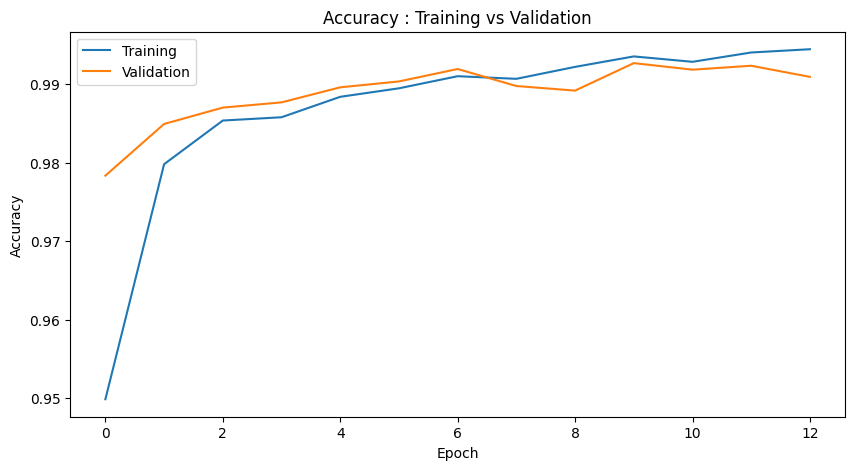

In [28]:
if not isinstance(hist, dict) :
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

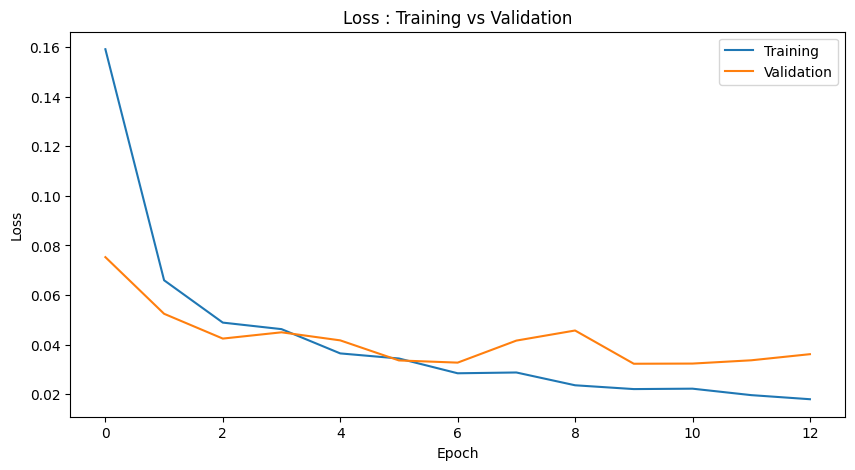

In [29]:
if not isinstance(hist, dict) :
    history = hist.history

plt.figure(figsize=(10, 5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

* 예측값 생성

In [30]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

train_y_arg = train_y.argmax(axis=1)
test_y_arg = test_y.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y_arg, single_pred_train)
logi_test_accuracy = accuracy_score(test_y_arg, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%' )
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%' )

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN
트레이닝 정확도 : 99.67%
테스트 정확도 : 99.40%


## 숫자 이미지 시각화

id = 8653
다음 그림은 숫자 5 입니다.
모델의 예측 : 5
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0. 99.  0.  0.  0.  0.]
정답입니다


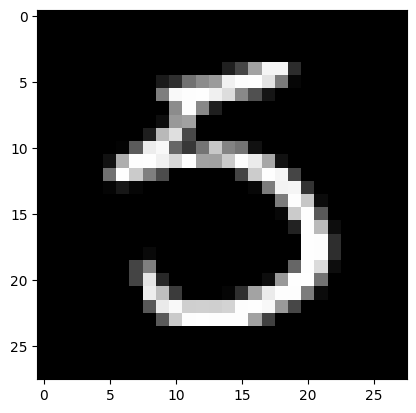

In [31]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y_arg[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y_arg[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

id = 1878
다음 그림은 숫자 8 입니다.
모델의 예측 : 3
모델의 카테고리별 확률 : [ 0.  0.  0. 99.  0.  0.  0.  0.  0.  0.]
틀렸어요


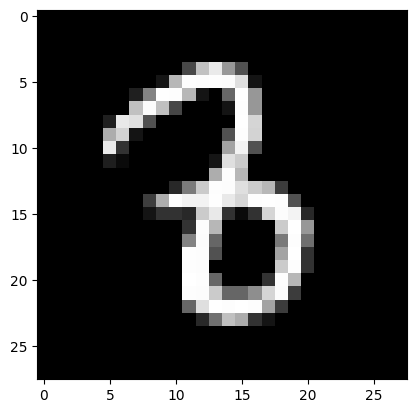

In [35]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y_arg==single_pred_test)
f_id = np.where(true_false==False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {test_y_arg[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y_arg[id] == single_pred_test[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()